# Fixed Coupon Bond

The goal of the project is to compute the market value of a portfolio if fixed coupon bonds taking into account the issuer credit risk. The input parameters to derive this curve are:

* The par rate of a set of Overnight Index Swaps (i.e. their market quotation)
* A set of survival probabilities and the recovery rate of the issuer

The static data of the pool of bonds (nominal, start date, end date, coupons, payment frequency)

Numerical results must be presented to the examining committee during a presentation in which the candidates will also explain the theoretical framework for evaluation of risky flows.

In [1]:
from datetime import date

In [2]:
today = date(2013, 10, 31)

In [3]:
ois_quotes = [
    {'maturity': 1, 'rate': 0.00106},
    {'maturity': 2, 'rate': 0.00114},
    {'maturity': 3, 'rate': 0.00115},
    {'maturity': 4, 'rate': 0.00117},
    {'maturity': 5, 'rate': 0.00119},
    {'maturity': 6, 'rate': 0.00121},
    {'maturity': 7, 'rate': 0.00122},
    {'maturity': 8, 'rate': 0.00124},
    {'maturity': 9, 'rate': 0.00128},
    {'maturity': 10, 'rate': 0.00131},
    {'maturity': 11, 'rate': 0.00135},
    {'maturity': 12, 'rate': 0.00138},
    {'maturity': 15, 'rate': 0.00152},
    {'maturity': 18, 'rate': 0.00166},
    {'maturity': 21, 'rate': 0.00184},
    {'maturity': 24, 'rate': 0.00206},
    {'maturity': 36, 'rate': 0.00344},
    {'maturity': 48, 'rate': 0.00543},
    {'maturity': 60, 'rate': 0.00756},
    {'maturity': 72, 'rate': 0.00967},
    {'maturity': 84, 'rate': 0.01162},
    {'maturity': 96, 'rate': 0.0134},
    {'maturity': 108, 'rate': 0.01502},
    {'maturity': 120, 'rate': 0.01649},
    {'maturity': 132, 'rate': 0.01776},
    {'maturity': 144, 'rate': 0.01888},
    {'maturity': 180, 'rate': 0.02137},
    {'maturity': 240, 'rate': 0.02322},
    {'maturity': 300, 'rate': 0.02389},
    {'maturity': 360, 'rate': 0.02416},
]

In [4]:
survival_probabilities = [
    {'date': date(2014, 12, 20), 'ndp': 0.972159727015014},
    {'date': date(2015, 12, 20), 'ndp': 0.942926329174406},
    {'date': date(2016, 12, 20), 'ndp': 0.913448056250137},
    {'date': date(2018, 12, 20), 'ndp': 0.855640452819766},
    {'date': date(2023, 12, 20), 'ndp': 0.732687779675469},
    {'date': date(2033, 12, 20), 'ndp': 0.539046016487758},
]

In [5]:
bonds_to_price = [
    {'nominal': 4972284.02, 'start_date': date(2010, 3, 1), 'end_date': date(2021, 8, 1), 'coupon_frequency': 3, 'coupon': 0.035, 'recovery': 0.2},
    {'nominal': 7344328.27, 'start_date': date(2009, 7, 1), 'end_date': date(2022, 7, 1), 'coupon_frequency': 3, 'coupon': 0.035, 'recovery': 0.2},
    {'nominal': 7172290.19, 'start_date': date(2013, 1, 1), 'end_date': date(2017, 9, 1), 'coupon_frequency': 6, 'coupon': 0.02, 'recovery': 0.4},
    {'nominal': 7065224.23, 'start_date': date(2010, 3, 1), 'end_date': date(2014, 10, 1), 'coupon_frequency': 6, 'coupon': 0.02, 'recovery': 0.4},
    {'nominal': 5256452.14, 'start_date': date(2011, 7, 1), 'end_date': date(2016, 4, 1), 'coupon_frequency': 6, 'coupon': 0.02, 'recovery': 0.4},
    {'nominal': 2689680.89, 'start_date': date(2009, 9, 1), 'end_date': date(2024, 7, 1), 'coupon_frequency': 6, 'coupon': 0.02, 'recovery': 0.6},
    {'nominal': 3593518.71, 'start_date': date(2010, 7, 1), 'end_date': date(2019, 2, 1), 'coupon_frequency': 12, 'coupon': 0.02, 'recovery': 0.6},
    {'nominal': 6993589.53, 'start_date': date(2011, 1, 1), 'end_date': date(2018, 11, 1), 'coupon_frequency': 12, 'coupon': 0.02, 'recovery': 0.6},
    {'nominal': 6684377.52, 'start_date': date(2009, 9, 1), 'end_date': date(2021, 9, 1), 'coupon_frequency': 12, 'coupon': 0.02, 'recovery': 0.6},
    {'nominal': 6896199.04, 'start_date': date(2010, 7, 1), 'end_date': date(2018, 11, 1), 'coupon_frequency': 12, 'coupon': 0.027, 'recovery': 0.4},
    {'nominal': 2587984.6, 'start_date': date(2011, 10, 1), 'end_date': date(2020, 10, 1), 'coupon_frequency': 12, 'coupon': 0.02, 'recovery': 0.4},
    {'nominal': 3621656.1, 'start_date': date(2012, 6, 1), 'end_date': date(2016, 7, 1), 'coupon_frequency': 6, 'coupon': 0.027, 'recovery': 0.4},
    {'nominal': 3146567.47, 'start_date': date(2011, 6, 1), 'end_date': date(2022, 3, 1), 'coupon_frequency': 6, 'coupon': 0.018, 'recovery': 0.2},
    {'nominal': 6452721.61, 'start_date': date(2009, 4, 1), 'end_date': date(2019, 4, 1), 'coupon_frequency': 3, 'coupon': 0.018, 'recovery': 0.2},
    {'nominal': 3418346.24, 'start_date': date(2010, 5, 1), 'end_date': date(2016, 1, 1), 'coupon_frequency': 3, 'coupon': 0.018, 'recovery': 0.2},
]

In [6]:
from finmarkets import DiscountCurve, OvernightIndexSwap, generate_swap_dates, CreditCurve
import numpy
import math
from dateutil.relativedelta import relativedelta
from math import log, exp

In [7]:
pillar_dates = [today]

swaps =[]

for quote in ois_quotes:
    swap = OvernightIndexSwap(1e6, generate_swap_dates(today,quote['maturity']),quote ['rate'])
    
    swaps.append(swap)
    pillar_dates.append(swap.payment_dates[-1])
    
pillar_dates = sorted(pillar_dates)

n_df_vector = len(pillar_dates)

In [8]:
def objective_function(x):
    
    curve = DiscountCurve(today, pillar_dates, x)
    
    sum_sq = 0.0
    
    for swap in swaps:
        sum_sq += swap.npv(curve) ** 2
        
    return sum_sq

In [9]:
from scipy.optimize import minimize

x0 = [1.0 for i in range (n_df_vector)]
bounds = [(0.01,100.0) for i in range (n_df_vector)]

bounds[0] =(1.0,1.0)

result = minimize(objective_function,x0,bounds = bounds)

In [10]:
result

      fun: 0.0006561289617343681
 hess_inv: <31x31 LbfgsInvHessProduct with dtype=float64>
      jac: array([  5.79535028e+05,  -2.83218934e-04,  -3.24325918e-04,
        -3.24159579e-04,  -3.11566549e-04,  -3.47202302e-04,
        -3.37286536e-04,  -2.87379278e-04,  -3.00610990e-04,
        -1.85489428e-04,  -1.04252349e-04,  -1.83492718e-04,
        -2.94808939e-03,   2.00371273e-03,   2.00847496e-03,
         1.81515215e-03,  -3.54846144e-05,   2.00860662e-03,
         2.38655352e-03,   3.97161774e-04,  -1.98724676e-03,
        -2.75156432e-03,  -2.29866937e-03,  -8.43167853e-04,
         6.34871300e-04,   1.69981809e-03,   1.69039171e-03,
        -9.39553654e-04,   1.63573292e-03,   1.01803082e-04,
        -1.37813924e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 448
      nit: 11
   status: 0
  success: True
        x: array([ 1.        ,  0.99991167,  0.99980687,  0.99970619,  0.99961015,
        0.99950111,  0.999392  ,  0.99928207,  0.99916713, 

In [11]:
objective_function(x0)      #test1

1398807951100.5298

In [12]:
objective_function(result.x)    #test2 the value has to be very lower rather than the x0 value.

0.0006561289617343681

In [13]:
curve = DiscountCurve (today,pillar_dates,result.x)
curve.df(date(2026,10,6))         #test work of interpolation

0.7649446612304569

In [14]:
xp = pillar_dates
fp = result.x

In [15]:
xp

[datetime.date(2013, 10, 31),
 datetime.date(2013, 11, 30),
 datetime.date(2013, 12, 31),
 datetime.date(2014, 1, 31),
 datetime.date(2014, 2, 28),
 datetime.date(2014, 3, 31),
 datetime.date(2014, 4, 30),
 datetime.date(2014, 5, 31),
 datetime.date(2014, 6, 30),
 datetime.date(2014, 7, 31),
 datetime.date(2014, 8, 31),
 datetime.date(2014, 9, 30),
 datetime.date(2014, 10, 31),
 datetime.date(2015, 1, 31),
 datetime.date(2015, 4, 30),
 datetime.date(2015, 7, 31),
 datetime.date(2015, 10, 31),
 datetime.date(2016, 10, 31),
 datetime.date(2017, 10, 31),
 datetime.date(2018, 10, 31),
 datetime.date(2019, 10, 31),
 datetime.date(2020, 10, 31),
 datetime.date(2021, 10, 31),
 datetime.date(2022, 10, 31),
 datetime.date(2023, 10, 31),
 datetime.date(2024, 10, 31),
 datetime.date(2025, 10, 31),
 datetime.date(2028, 10, 31),
 datetime.date(2033, 10, 31),
 datetime.date(2038, 10, 31),
 datetime.date(2043, 10, 31)]

In [16]:
fp

array([ 1.        ,  0.99991167,  0.99980687,  0.99970619,  0.99961015,
        0.99950111,  0.999392  ,  0.99928207,  0.99916713,  0.99903027,
        0.998895  ,  0.99874906,  0.99860278,  0.99807334,  0.99748678,
        0.99674625,  0.99583439,  0.98958294,  0.97817155,  0.9622335 ,
        0.94245275,  0.91997975,  0.89555481,  0.86968378,  0.84283835,
        0.81600063,  0.78928833,  0.7134728 ,  0.61195787,  0.53249163,
        0.46686384])

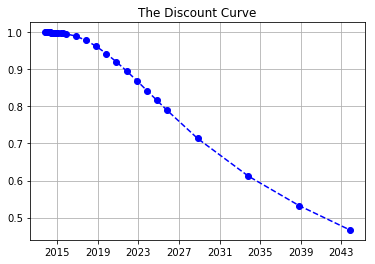

In [17]:
from matplotlib import pyplot as plt
plt.plot(xp, fp, 'b--o')
plt.title('The Discount Curve')
plt.grid()
plt.show()

In [18]:
pillar_datesII = [] # _datesII to differentiate from pillar_dates of the Discount Curve
pillar_ndps = []

for quote in survival_probabilities:
    pillar_datesII.append(quote ['date'])
    pillar_ndps.append(quote['ndp'])

In [19]:
def diff_month(d1, d2):
    return (d1.year - d2.year)*12 + d1.month - d2.month 

bond_value_list = []
num_bond_list = []

  
number_of_bonds = 0    
mkt_value_portf = 0

for quote in bonds_to_price:

    N = quote['nominal']
    start_date = quote['start_date']
    end_date = quote['end_date']
    frequency = quote['coupon_frequency']
    coupon_rate = quote['coupon']
    recovery_rate = quote['recovery']
    lgd = 1- recovery_rate
         
    t_adj = diff_month(end_date, start_date)   # number of months between the start_date date and the end date
    zzz = t_adj % (12 / frequency)
    if zzz == 0:                            
        u = t_adj / (12 / frequency)
    else:                                     # when zzz is different from zero , N is given back 1 or more months after the last coupon has been paid
        differ=0
        while (t_adj ) % (12 / frequency) != 0:
            
            t_adj= t_adj - 1
            differ += 1
        u = t_adj  / (12 / frequency)
    
    periods = round(u)
     
    coupon = coupon_rate * N / frequency
     
    npv = 0
     
    days_between_payments = (12 / frequency) * 30    # how often the coupon is paid (in days)
     
    ccv = CreditCurve(pillar_datesII, pillar_ndps)
    curve = DiscountCurve(today, pillar_dates, result.x)
    
    dist_today = (today - start_date).days
    ref_distance = (date(2014,12,20) - today).days
     
    # 2014/12/20  is the 1st pillar ndp date. Looking at the pillar ndps box it's clear that before 2014/12/20 the 
    # survival probability is 1 or quite close to 1 and thus the default probability for the period before that date
    # is negligible. Consequently the interpolation of ndps 
    # is done only for dates included between 2014/12/20 and 2033/12/20.
    
    for i in range(1, periods):
        days_between = round(days_between_payments * i)  # number of days between the start date and the single payment date
        bond_date = (start_date + relativedelta(days=days_between))
        bond_date_dist = (bond_date - start_date).days
        
        if bond_date_dist < dist_today:
            npv += 0
        else:
            right_distance = (bond_date - today).days
            disc_fact = curve.df(today + relativedelta(days = right_distance))
           
            if right_distance < ref_distance:
                npv += coupon * disc_fact
            else:   
                hazard = ccv.hazard(today + relativedelta(days=right_distance))
                npv += coupon * disc_fact * exp(-(lgd * hazard* (right_distance/365)))
                 
    # last coupon payment date
    lp = days_between_payments * periods 
    last_date = (start_date + relativedelta(days=lp))
    last_hazard = ccv.hazard(last_date)
    last_disc_fact = curve.df(last_date)
    last_distance = (last_date - today).days 
   
    # when the notional is given back one month later
    extra_lp = days_between_payments * (periods + differ)
    extra_date = (start_date + relativedelta(days=extra_lp))
    extra_hazard = ccv.hazard(extra_date)
    extra_disc_fact = curve.df(extra_date)
    extra_distance = (extra_date - today).days
     
    if zzz == 0:     # the notional is given back on the same date of the last payment    

         
        final = npv + coupon * last_disc_fact * exp(-(lgd * last_hazard * (last_distance/365)))  + N * last_disc_fact * exp(-(lgd * last_hazard * (last_distance/365))) 
         
    else:   # the notional is given back one or more months after the last coupon has been paid 

        final = npv + coupon * last_disc_fact * exp(-(lgd * last_hazard * (last_distance/365))) + N * extra_disc_fact * exp(-(lgd * extra_hazard * (extra_distance/365)))
    
    mkt_value_bond = round(final,1)
    
    
    number_of_bonds += 1 
    
    bond_value_list.append(mkt_value_bond)
    num_bond_list.append(number_of_bonds)
    
    print  (  "Bond Market Value:  %s    " %   mkt_value_bond,"(", number_of_bonds, ")" )
      
        
    

    mkt_value_portf +=  mkt_value_bond
    
print("                                     Portfolio Market Value:  %s" % round( mkt_value_portf,1), "(", "Total" ,")")
    
        

Bond Market Value:  4861794.5     ( 1 )
Bond Market Value:  7183110.3     ( 2 )
Bond Market Value:  7060920.9     ( 3 )
Bond Market Value:  7173875.6     ( 4 )
Bond Market Value:  5225655.6     ( 5 )
Bond Market Value:  2472236.5     ( 6 )
Bond Market Value:  3586376.5     ( 7 )
Bond Market Value:  6995338.7     ( 8 )
Bond Market Value:  6462107.9     ( 9 )
Bond Market Value:  6922993.0     ( 10 )
Bond Market Value:  2437879.1     ( 11 )
Bond Market Value:  3666819.6     ( 12 )
Bond Market Value:  2691719.6     ( 13 )
Bond Market Value:  6025951.9     ( 14 )
Bond Market Value:  3374091.1     ( 15 )
                                     Portfolio Market Value:  76140870.8 ( Total )


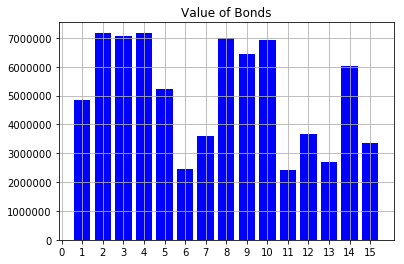

In [20]:
import numpy as np
y = bond_value_list 
x = num_bond_list
plt.bar(x,y, align= 'center', width=0.80, color= 'blue')
plt.title('Value of Bonds')
plt.xticks(np.linspace(0,15,16))
plt.grid()
plt.show()

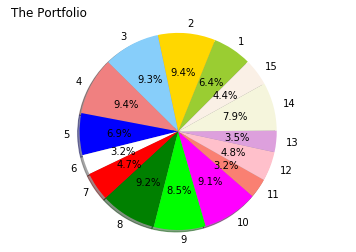

In [21]:
labels = num_bond_list
sizes = bond_value_list 
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'blue', 'white', 'red',
          'green', 'lime', 'magenta', 'salmon', 'pink', 'plum', 'beige', 'linen']
fig1, ax1 = plt.subplots()
plt.title('The Portfolio', loc='left' )
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal') 
plt.show()